# Main code for Atlas project

In [1]:
import imageio
import matplotlib.pyplot as plt
import elastix
import numpy as np
import os
import SimpleITK as sitk


In [2]:

# IMPORTANT: these paths may differ on your system, depending on where
# Elastix has been installed. Please set accordingly.
ELASTIX_PATH = os.path.join(r'C:/Users/20212059/Documents/CapitaSelecta/elastix-5.0.0-win64/elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:/Users/20212059/Documents/CapitaSelecta/elastix-5.0.0-win64/transformix.exe')


In [3]:

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

if os.path.exists('results') is False:
    os.mkdir('results')


C:\Users\20212059\AppData\Local\Temp\ipykernel_22176\1292926585.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  prostate_mask = imageio.imread(path+"prostaat.mhd")
C:\Users\20212059\AppData\Local\Temp\ipykernel_22176\1292926585.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  prostate = imageio.imread(path+"mr_bffe.mhd")


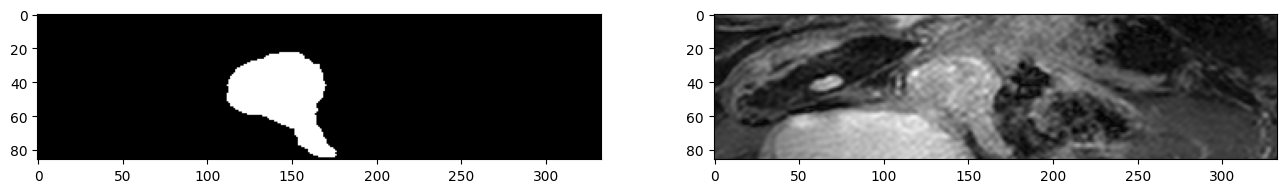

In [4]:
# Plot figures
path = "../DevelopmentData/DevelopmentData/p102/"
slice = 150
prostate_mask = imageio.imread(path+"prostaat.mhd")
prostate = imageio.imread(path+"mr_bffe.mhd")
fig, ax = plt.subplots(1,2, figsize=(16,10))
ax[0].imshow(prostate_mask[:,:,slice], cmap="gray")
ax[1].imshow(prostate[:,:,slice], cmap="gray")

In [45]:
# Define the paths to the two images you want to register
use_mask = False

fixed_image_path = os.path.join('../DevelopmentData/DevelopmentData/p102/mr_bffe.mhd')
moving_image_path = os.path.join('../DevelopmentData/DevelopmentData/p107/mr_bffe.mhd')

if use_mask:
    fixed_image_path = os.path.join('../DevelopmentData/DevelopmentData/p102/prostaat.mhd')
    moving_image_path = os.path.join('../DevelopmentData/DevelopmentData/p107/prostaat.mhd')

el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join('parameters_bspline_multires_MR.txt')],
    output_dir='results')
tr = elastix.TransformixInterface(parameters="results/TransformParameters.0.txt", transformix_path=TRANSFORMIX_PATH)

C:/Users/20212059/Documents/CapitaSelecta/elastix-5.0.0-win64/elastix.exe -f ../DevelopmentData/DevelopmentData/p102/mr_bffe.mhd -m ../DevelopmentData/DevelopmentData/p107/mr_bffe.mhd -p parameters_bspline_multires_MR.txt -out results


In [46]:

jacobian_matrix_path = tr.jacobian_determinant(output_dir=r'results')

C:\Users\20212059\AppData\Local\Temp\ipykernel_22176\2100153709.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imageio.imread(jacobian_matrix_path.replace('dcm', 'tiff'))[:,:,120])


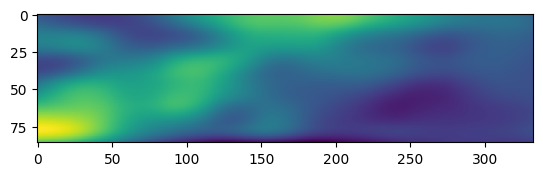

In [47]:
slice = 80
plt.imshow(imageio.imread(jacobian_matrix_path.replace('dcm', 'tiff'))[:,:,120])

In [48]:
transformed_image_path = tr.transform_image(moving_image_path, output_dir=r'results')

C:\Users\20212059\AppData\Local\Temp\ipykernel_22176\3545966020.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ax[0].imshow(imageio.imread(fixed_image_path)[:,:,slice], cmap='gray');
C:\Users\20212059\AppData\Local\Temp\ipykernel_22176\3545966020.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ax[1].imshow(imageio.imread(moving_image_path)[:,:,slice], cmap='gray');
C:\Users\20212059\AppData\Local\Temp\ipykernel_22176\3545966020.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (

Text(0.5, 1.0, 'Output image from elastix')

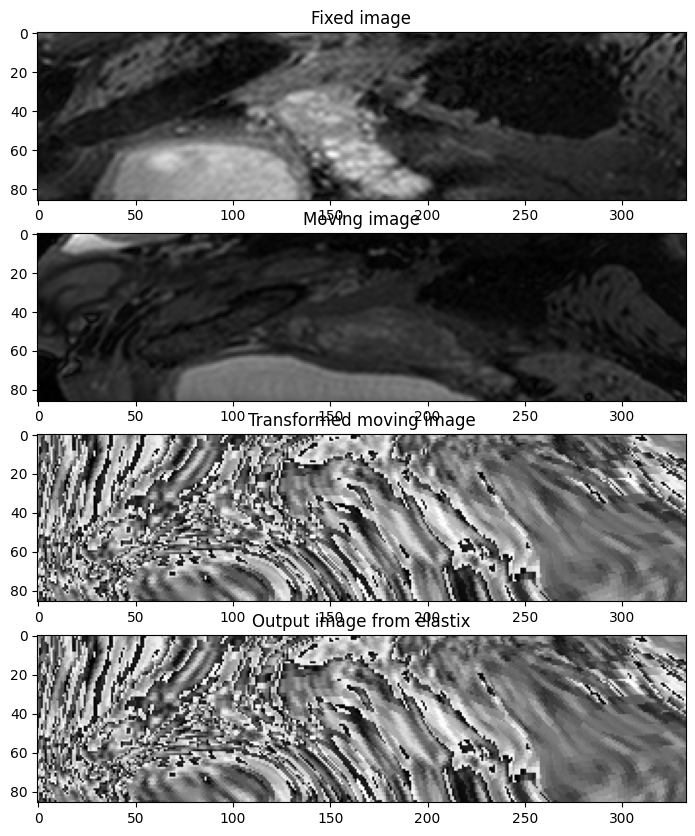

In [50]:
fig, ax = plt.subplots(4,1, figsize=(20,10))
slice = 100;
ax[0].imshow(imageio.imread(fixed_image_path)[:,:,slice], cmap='gray');
ax[1].imshow(imageio.imread(moving_image_path)[:,:,slice], cmap='gray');
ax[2].imshow(imageio.imread(transformed_image_path)[:,:,slice], cmap='gray');
ax[3].imshow(imageio.imread("results/result.0.tiff")[:,:,slice], cmap='gray');

ax[0].set_title("Fixed image")
ax[1].set_title("Moving image")
ax[2].set_title("Transformed moving image")
ax[3].set_title("Output image from elastix")

Text(0.5, 0, 'Iteration')

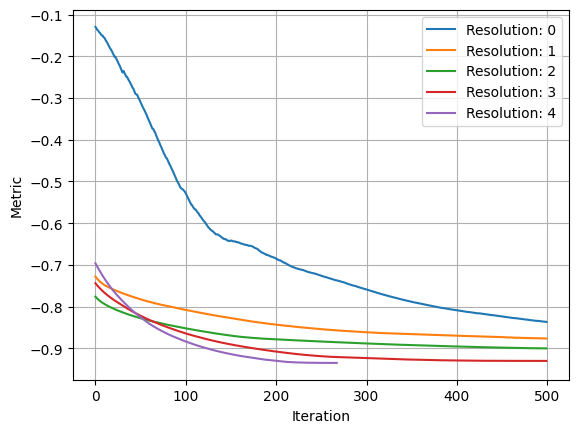

In [31]:
for i in range(5):
    log = elastix.logfile("results/IterationInfo.0.R" + str(i) +".txt")
    figure = plt.plot(log["itnr"], log["metric" ])
    plt.grid()
plt.legend(["Resolution: "+str(x) for x in range(5)])
plt.ylabel("Metric")
plt.xlabel("Iteration")